# Import

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import emd
import pandas as pd

from scipy.stats import zscore as zscore
from scipy import signal
from scipy.signal import welch as welch

import scipy.signal as sig

In [2]:
samplingRate=1250

In [3]:
dataTV139=sio.loadmat('/home/timviney/ephys/TV139HF5_localWB_1260Hz.mat')

In [4]:
dataTV140=sio.loadmat('/home/timviney/ephys/TV140HF1-WB1250Hz.mat')

In [5]:
dataTV136=sio.loadmat('/home/timviney/ephys/TV136HF2-WB1250Hz.mat')

In [6]:
dataTV145=sio.loadmat('/home/timviney/ephys/TV145-Ch8-WB1250Hz.mat')

In [7]:
dataTV153=sio.loadmat('/home/timviney/ephys/TV153-Ch10-WB1250Hz.mat')

In [8]:
dataTV140.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file', 'TV140_HF1_Ch1'])

In [9]:
dataTV136.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file', 'TV136_HF2_Ch1'])

In [10]:
dataTV139.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file', 'TV139_HF5_Ch4'])

In [11]:
dataTV145.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file', 'TV145_LHS_842um_L3_Ch16'])

In [12]:
dataTV153.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file', 'TV153_1_RHS_95C7_2117um_Lmaze_Ch14'])

In [13]:
dataTV153lfp=np.ndarray.flatten(dataTV153['TV153_1_RHS_95C7_2117um_Lmaze_Ch14'][0,0][8])

In [14]:
dataTV139lfp=np.ndarray.flatten(dataTV139['TV139_HF5_Ch4'][0,0][8])

In [15]:
dataTV140lfp=np.ndarray.flatten(dataTV140['TV140_HF1_Ch1'][0,0][8])

In [16]:
dataTV136lfp=np.ndarray.flatten(dataTV136['TV136_HF2_Ch1'][0,0][8])

In [18]:
dataTV145lfp=np.ndarray.flatten(dataTV145['TV145_LHS_842um_L3_Ch16'][0,0][8])

# Visualise imported data

### TV139 = 18 month-old transgenic mouse
### TV140 = aged-matched non-transgenic littermate

all data


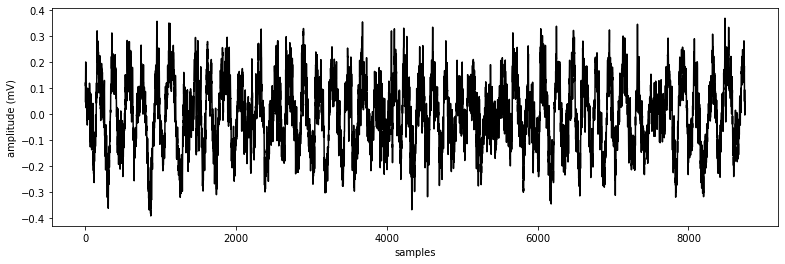

In [19]:
plt.figure(figsize=(13,4))
plt.plot(dataTV139lfp[64*samplingRate:71*samplingRate],'k')
plt.ylabel('amplitude (mV)')
plt.xlabel('samples')
print('all data')
plt.savefig('dataTV139lfp-64s-71s.svg')

all data


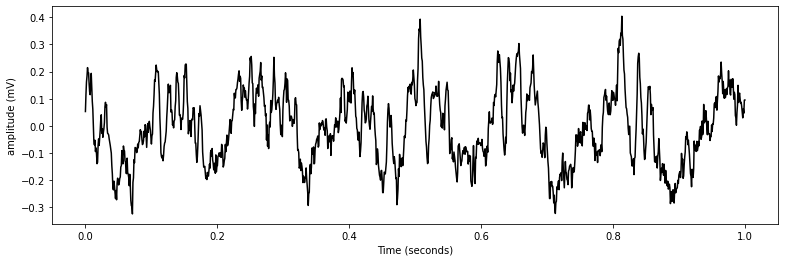

In [20]:
seconds = 1
t = np.linspace(0, seconds, seconds*samplingRate)
# this will enable the x-axis to be plotted as seconds instead of samples

plt.figure(figsize=(13,4))
plt.plot(t,dataTV136lfp[105*samplingRate:106*samplingRate],'k')
plt.ylabel('amplitude (mV)')
plt.xlabel('Time (seconds)')
print('all data')
plt.savefig('dataTV136lfp-105s-106s.svg')

## Check PSD 

In [21]:
freqTV139,pxxTV139 = welch(dataTV139lfp[35*samplingRate:129*samplingRate].T,fs=samplingRate,nperseg=samplingRate*2)

In [22]:
freqTV140,pxxTV140 = welch(dataTV140lfp[102*samplingRate:117*samplingRate].T,fs=samplingRate,nperseg=samplingRate*2)

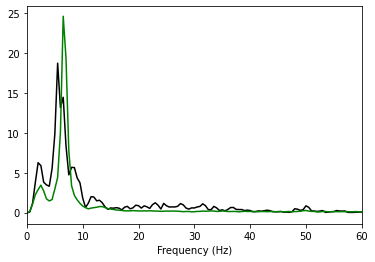

In [23]:
%matplotlib inline
plt.plot(freqTV140,zscore(pxxTV140.T),'k')
plt.plot(freqTV139,zscore(pxxTV139.T),'g')
plt.xlim(0,60)
plt.xlabel('Frequency (Hz)')
plt.savefig('PSDthetaTV140blackTV139green.svg')

# EMD

In [24]:
mask_freqs=np.array([350, 200, 70, 40, 30, 7, 1])/samplingRate

In [25]:
imfsDataTV139lfp, mask_freqs = emd.sift.mask_sift(dataTV139lfp[35*samplingRate:135*samplingRate], mask_freqs=mask_freqs, ret_mask_freq=True, max_imfs=len(mask_freqs))

In [26]:
imfsDataTV140lfp, mask_freqs = emd.sift.mask_sift(dataTV140lfp[102*samplingRate:117*samplingRate], mask_freqs=mask_freqs, ret_mask_freq=True, max_imfs=len(mask_freqs))

In [27]:
imfsDataTV136lfp, mask_freqs = emd.sift.mask_sift(dataTV136lfp[99*samplingRate:129*samplingRate], mask_freqs=mask_freqs, ret_mask_freq=True, max_imfs=len(mask_freqs))

In [28]:
imfsDataTV153lfp, mask_freqs = emd.sift.mask_sift(dataTV153lfp[386*samplingRate:480*samplingRate], mask_freqs=mask_freqs, ret_mask_freq=True, max_imfs=len(mask_freqs))

In [29]:
imfsDataTV145lfp, mask_freqs = emd.sift.mask_sift(dataTV145lfp[66*samplingRate:172*samplingRate], mask_freqs=mask_freqs, ret_mask_freq=True, max_imfs=len(mask_freqs))

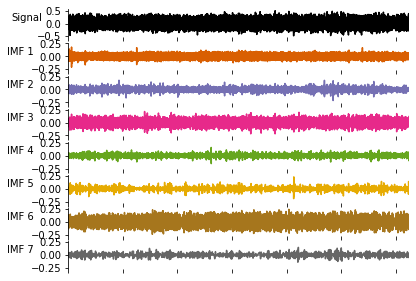

In [30]:
emd.plotting.plot_imfs(imfsDataTV139lfp,scale_y=True,cmap=True)

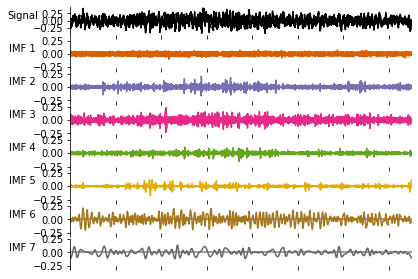

In [31]:
emd.plotting.plot_imfs(imfsDataTV140lfp,scale_y=True,cmap=True)

## Check IMFs

all data


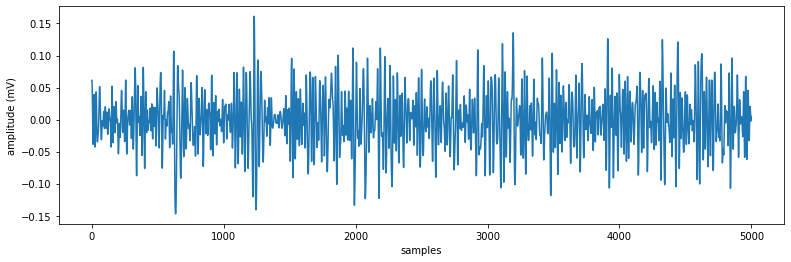

In [32]:
plt.figure(figsize=(13,4))
plt.plot(imfsDataTV139lfp.T[2][0:5000])
plt.ylabel('amplitude (mV)')
plt.xlabel('samples')
print('all data')

### Check PSD from IMFs

In [33]:
freqTV139,pxxTV139=welch(imfsDataTV139lfp.T,fs=samplingRate,window='hann',nperseg=samplingRate*2)

In [34]:
freqTV140,pxxTV140=welch(imfsDataTV140lfp.T,fs=samplingRate,window='hann',nperseg=samplingRate*2)

(0.0, 250.0)

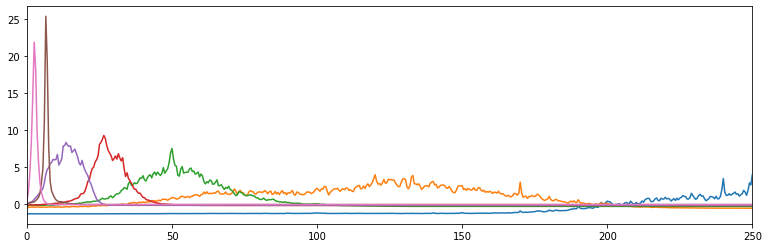

In [35]:
plt.figure(figsize=(13,4))
plt.plot(freqTV139,zscore(pxxTV139.T))
plt.xlim(0,250)

(0.0, 250.0)

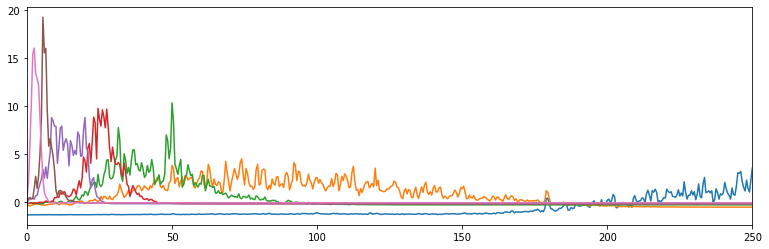

In [36]:
plt.figure(figsize=(13,4))
plt.plot(freqTV140,zscore(pxxTV140.T))
plt.xlim(0,250)

## HHT
### Find mean frequency of IMFs from instantaneous frequency values

In [37]:
IPtv139, IFtv139, IAtv139 = emd.spectra.frequency_transform(imfsDataTV139lfp, samplingRate, 'nht')

In [38]:
IPtv140, IFtv140, IAtv140 = emd.spectra.frequency_transform(imfsDataTV140lfp, samplingRate, 'nht')

In [39]:
IPtv153, IFtv153, IAtv153 = emd.spectra.frequency_transform(imfsDataTV153lfp, samplingRate, 'nht')

In [40]:
IPtv136, IFtv136, IAtv136 = emd.spectra.frequency_transform(imfsDataTV136lfp, samplingRate, 'nht')

In [41]:
IPtv145, IFtv145, IAtv145 = emd.spectra.frequency_transform(imfsDataTV145lfp, samplingRate, 'nht')

# HHT analysis

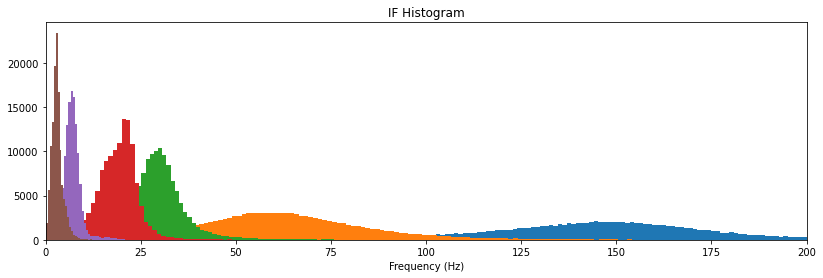

In [43]:
plt.figure(figsize=(30, 4))
plt.subplot(121)
plt.xticks(ticks=np.arange(0,200,20),visible=True)
plt.hist(IFtv139.T[1], bins=500)
plt.hist(IFtv139.T[2], bins=500)
plt.hist(IFtv139.T[3], bins=500)
plt.hist(IFtv139.T[4], bins=500)
plt.hist(IFtv139.T[5], bins=500)
plt.hist(IFtv139.T[6], bins=500)
plt.grid(False)
plt.xlim(0,200)
plt.title('IF Histogram')
plt.xlabel('Frequency (Hz)')
plt.xscale('linear')


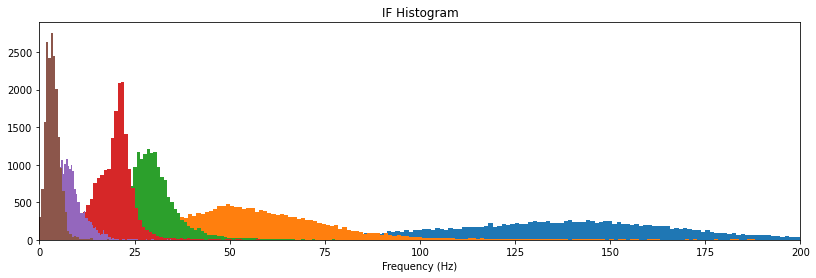

In [44]:
plt.figure(figsize=(30, 4))
plt.subplot(121)
plt.xticks(ticks=np.arange(0,200,20),visible=True)
plt.hist(IFtv140.T[1], bins=500)
plt.hist(IFtv140.T[2], bins=500)
plt.hist(IFtv140.T[3], bins=500)
plt.hist(IFtv140.T[4], bins=500)
plt.hist(IFtv140.T[5], bins=500)
plt.hist(IFtv140.T[6], bins=500)
plt.grid(False)
plt.xlim(0,200)
plt.title('IF Histogram')
plt.xlabel('Frequency (Hz)')
plt.xscale('linear')


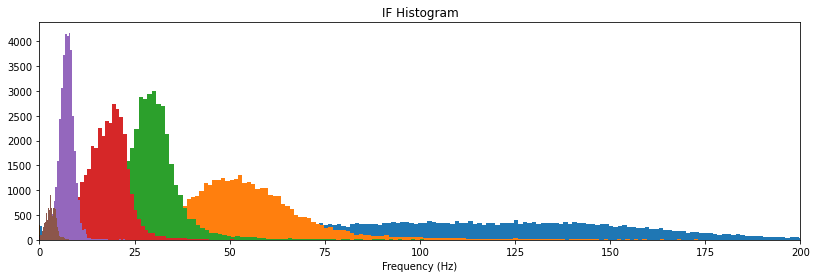

In [45]:
plt.figure(figsize=(30, 4))
plt.subplot(121)
plt.xticks(ticks=np.arange(0,200,20),visible=True)
plt.hist(IFtv136.T[1], bins=500)
plt.hist(IFtv136.T[2], bins=500)
plt.hist(IFtv136.T[3], bins=500)
plt.hist(IFtv136.T[4], bins=500)
plt.hist(IFtv136.T[5], bins=500)
plt.hist(IFtv136.T[6], bins=500)
plt.grid(False)
plt.xlim(0,200)
plt.title('IF Histogram')
plt.xlabel('Frequency (Hz)')
plt.xscale('linear')


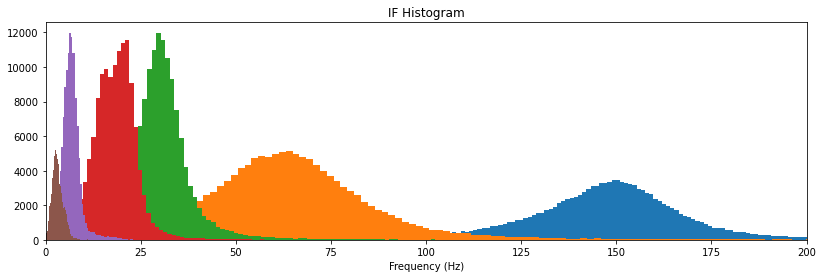

In [46]:
plt.figure(figsize=(30, 4))
plt.subplot(121)
plt.xticks(ticks=np.arange(0,200,20),visible=True)
plt.hist(IFtv145.T[1], bins=500)
plt.hist(IFtv145.T[2], bins=500)
plt.hist(IFtv145.T[3], bins=500)
plt.hist(IFtv145.T[4], bins=500)
plt.hist(IFtv145.T[5], bins=500)
plt.hist(IFtv145.T[6], bins=500)
plt.grid(False)
plt.xlim(0,200)
plt.title('IF Histogram')
plt.xlabel('Frequency (Hz)')
plt.xscale('linear')


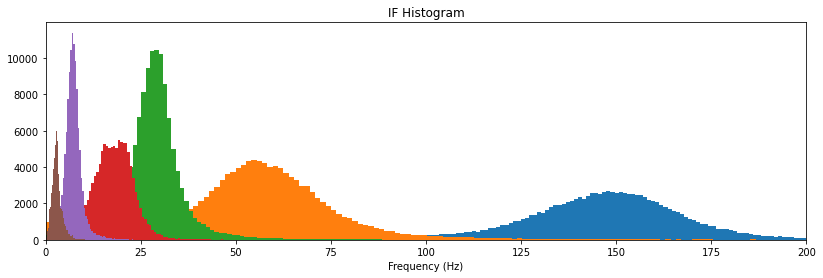

In [47]:
plt.figure(figsize=(30, 4))
plt.subplot(121)
plt.xticks(ticks=np.arange(0,200,20),visible=True)
plt.hist(IFtv153.T[1], bins=500)
plt.hist(IFtv153.T[2], bins=500)
plt.hist(IFtv153.T[3], bins=500)
plt.hist(IFtv153.T[4], bins=500)
plt.hist(IFtv153.T[5], bins=500)
plt.hist(IFtv153.T[6], bins=500)
plt.grid(False)
plt.xlim(0,200)
plt.title('IF Histogram')
plt.xlabel('Frequency (Hz)')
plt.xscale('linear')


In [48]:
np.mean(IFtv140.T[6]), np.mean(IFtv140.T[5]), np.mean(IFtv140.T[4]), np.mean(IFtv140.T[3]), np.mean(IFtv140.T[2]), np.mean(IFtv140.T[1])

(3.5260104773199132,
 8.055636649647429,
 19.523278684429474,
 29.320531276998686,
 55.7313961491627,
 134.21762679800204)

In [49]:
np.mean(IFtv153.T[6]), np.mean(IFtv153.T[5]), np.mean(IFtv153.T[4]), np.mean(IFtv153.T[3]), np.mean(IFtv153.T[2]), np.mean(IFtv153.T[1])

(2.9560220170340212,
 7.27591411714612,
 17.484754811036296,
 29.116266587985344,
 57.996098821143306,
 144.7223984571175)

In [50]:
np.mean(IFtv136.T[6]), np.mean(IFtv136.T[5]), np.mean(IFtv136.T[4]), np.mean(IFtv136.T[3]), np.mean(IFtv136.T[2]), np.mean(IFtv136.T[1])

(2.962546193801464,
 7.231633656185192,
 16.993183195916302,
 29.660556353810676,
 54.165228940095574,
 111.86538899797502)

In [51]:
np.mean(IFtv145.T[6]), np.mean(IFtv145.T[5]), np.mean(IFtv145.T[4]), np.mean(IFtv145.T[3]), np.mean(IFtv145.T[2]), np.mean(IFtv145.T[1])

(3.103089204035133,
 6.734327618261814,
 18.08364896492253,
 30.782733767448853,
 63.04459349683057,
 146.73258794105166)

## Comodulogram / PAC

### TV136 - PAC observed

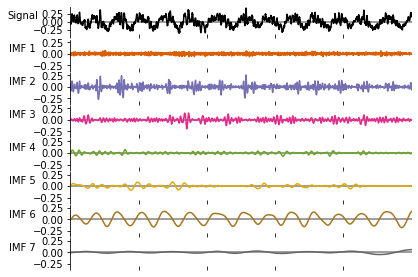

In [52]:
emd.plotting.plot_imfs(imfsDataTV136lfp[20*samplingRate:22*samplingRate],scale_y=True,cmap=True)

In [53]:
seconds = 2
t = np.linspace(0, seconds, seconds*samplingRate)

Text(0.5, 0, 'Time')

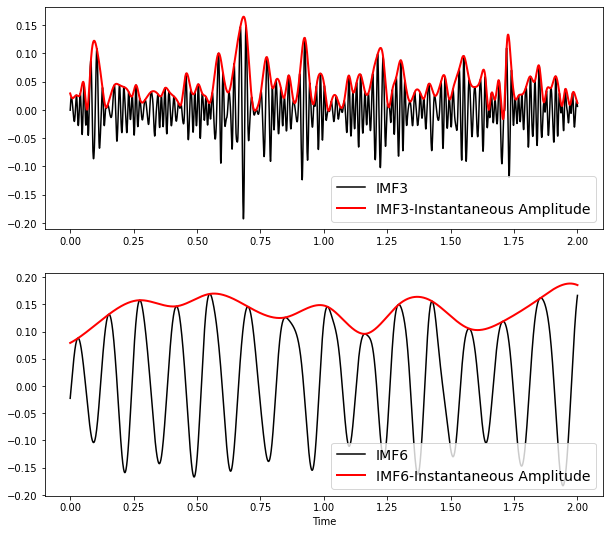

In [54]:
plt.figure(figsize=(10, 9))
plt.subplot(211)
plt.plot(t,imfsDataTV136lfp[20*samplingRate:22*samplingRate,2], 'k')
plt.plot(t,IAtv136[20*samplingRate:22*samplingRate,2], 'r', linewidth=2)
plt.legend(['IMF3', 'IMF3-Instantaneous Amplitude'], fontsize=14)
plt.subplot(212)
plt.plot(t,imfsDataTV136lfp[20*samplingRate:22*samplingRate,5], 'k')
plt.plot(t,IAtv136[20*samplingRate:22*samplingRate,5], 'r', linewidth=2)
plt.legend(['IMF6', 'IMF6-Instantaneous Amplitude'], fontsize=14)
plt.xlabel('Time')

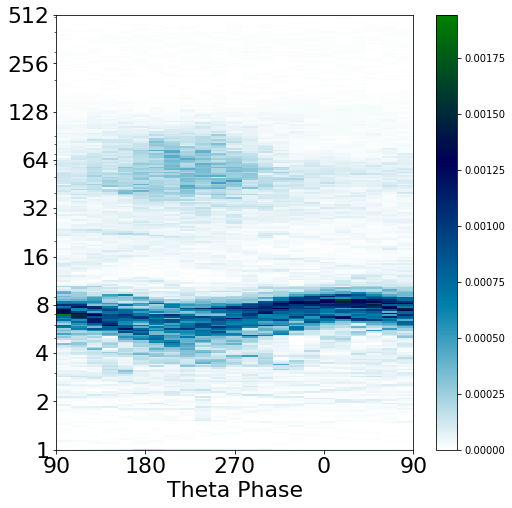

In [55]:
edges, bins = emd.spectra.define_hist_bins(1, 512, 256, 'log')
hht = emd.spectra.hilberthuang(IFtv136, IAtv136, edges)
hht_by_phase, _, _ = emd.cycles.bin_by_phase(IPtv136[:,5], hht.T)

plt.figure(figsize=(8, 8))
plt.pcolormesh(np.linspace(-np.pi, np.pi, 24), edges, hht_by_phase.T, cmap='ocean_r', shading='auto')
plt.yscale('log')
plt.yticks(2**np.arange(10), 2**np.arange(10),fontsize=22)
plt.xticks(np.linspace(-np.pi, np.pi, 5), ['90', '180', '270', '0', '90'],fontsize=22)
plt.xlabel('Theta Phase',fontsize=22)
plt.colorbar()
plt.savefig('TV136 PAC.svg')

all data


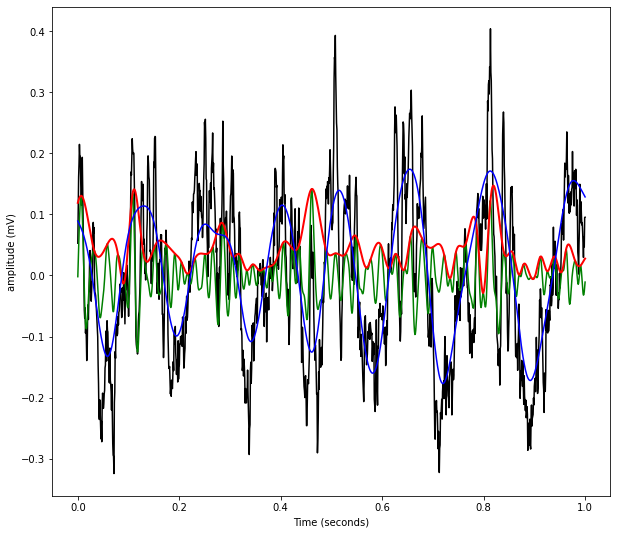

In [57]:
seconds = 1
t = np.linspace(0, seconds, seconds*samplingRate)

plt.figure(figsize=(10,9))
plt.plot(t,dataTV136lfp[105*samplingRate:106*samplingRate],'k')
plt.plot(t,imfsDataTV136lfp[(105-99)*samplingRate:(106-99)*samplingRate,2], 'g')
plt.plot(t,IAtv136[(105-99)*samplingRate:(106-99)*samplingRate,2], 'r', linewidth=2)
plt.plot(t,imfsDataTV136lfp[(105-99)*samplingRate:(106-99)*samplingRate,5], 'b')
plt.ylabel('amplitude (mV)')
plt.xlabel('Time (seconds)')
print('all data')
plt.savefig('dataTV136lfp-105s-106s-imfs.svg')

all data


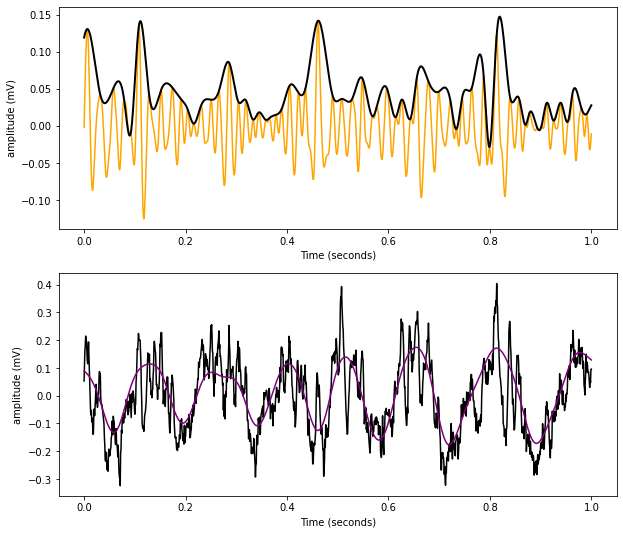

In [59]:
seconds = 1
t = np.linspace(0, seconds, seconds*samplingRate)

plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(t,imfsDataTV136lfp[(105-99)*samplingRate:(106-99)*samplingRate,2], 'Orange')
plt.plot(t,IAtv136[(105-99)*samplingRate:(106-99)*samplingRate,2], 'Black', linewidth=2)
plt.ylabel('amplitude (mV)')
plt.xlabel('Time (seconds)')

plt.subplot(212)
plt.plot(t,dataTV136lfp[105*samplingRate:106*samplingRate],'k')
plt.plot(t,imfsDataTV136lfp[(105-99)*samplingRate:(106-99)*samplingRate,5], 'Purple')
plt.ylabel('amplitude (mV)')
plt.xlabel('Time (seconds)')

print('all data')

### TV145 Si probe - very good mid-gamma PAC and high gamma

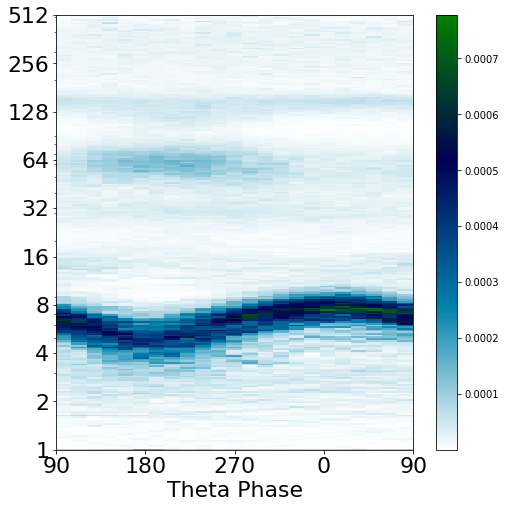

In [63]:
edges, bins = emd.spectra.define_hist_bins(1, 512, 256, 'log')
hht = emd.spectra.hilberthuang(IFtv145, IAtv145, edges)
hht_by_phase, _, _ = emd.cycles.bin_by_phase(IPtv145[:,5], hht.T)

plt.figure(figsize=(8, 8))
plt.pcolormesh(np.linspace(-np.pi, np.pi, 24), edges, hht_by_phase.T, cmap='ocean_r', shading='auto')
plt.yscale('log')
plt.yticks(2**np.arange(10), 2**np.arange(10),fontsize=22)
plt.xticks(np.linspace(-np.pi, np.pi, 5), ['90', '180', '270', '0', '90'],fontsize=22)
plt.xlabel('Theta Phase',fontsize=22)
plt.colorbar()
plt.savefig('TV145 PAC.svg')

all data


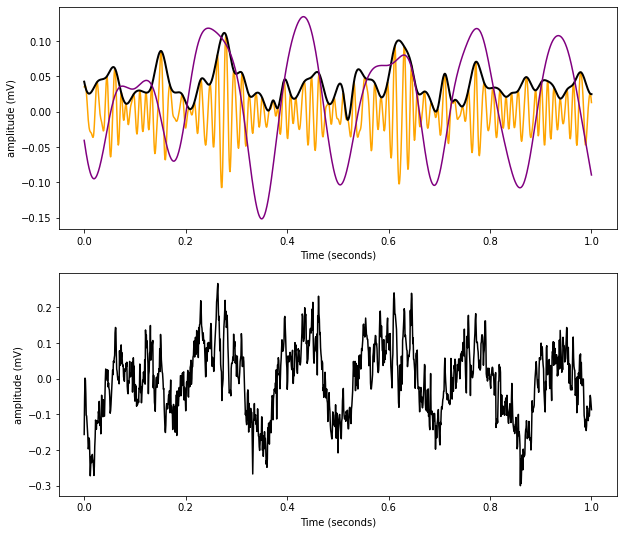

In [69]:
epochstart=66
start=159
end=160
seconds = end-start
t = np.linspace(0, seconds, seconds*samplingRate)

plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(t,imfsDataTV145lfp[(start-epochstart)*samplingRate:(end-epochstart)*samplingRate,2], 'Orange')
plt.plot(t,IAtv145[(start-epochstart)*samplingRate:(end-epochstart)*samplingRate,2], 'Black', linewidth=2)
plt.plot(t,imfsDataTV145lfp[(start-epochstart)*samplingRate:(end-epochstart)*samplingRate,5], 'Purple')
plt.ylabel('amplitude (mV)')
plt.xlabel('Time (seconds)')

plt.subplot(212)
plt.plot(t,dataTV145lfp[start*samplingRate:end*samplingRate],'k')
plt.ylabel('amplitude (mV)')
plt.xlabel('Time (seconds)')

print('all data')

### TV153 Si probe - good mid-gamma PAC and high gamma

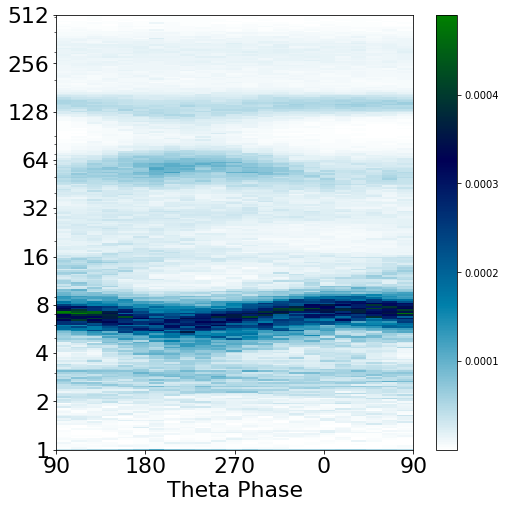

In [70]:
edges, bins = emd.spectra.define_hist_bins(1, 512, 256, 'log')
hht = emd.spectra.hilberthuang(IFtv153, IAtv153, edges)
hht_by_phase, _, _ = emd.cycles.bin_by_phase(IPtv153[:,5], hht.T)

plt.figure(figsize=(8, 8))
plt.pcolormesh(np.linspace(-np.pi, np.pi, 24), edges, hht_by_phase.T, cmap='ocean_r', shading='auto')
plt.yscale('log')
plt.yticks(2**np.arange(10), 2**np.arange(10),fontsize=22)
plt.xticks(np.linspace(-np.pi, np.pi, 5), ['90', '180', '270', '0', '90'],fontsize=22)
plt.xlabel('Theta Phase',fontsize=22)
plt.colorbar()